**Project title :- Bike Renting using Python**

**Problem statement :-**

The objective of this Case is to Predication of bike rental count on daily based on the environmental and seasonal settings.

**Contents :-**

    1. Exploratory Data Analysis
       * Loading the dataset and libraries
       * Data cleaning
       * Typecasting the attributes
       * Missing value analysis
    2. Attributes distributions and trends
       * Monthly distribution of counts
       * Yearly distribution of counts
       * Outliers analysis
    3. Normality test
    4. Correlation matrix 
    5. Split the dataset into train and test dataset
    6. Encoding the categorical features
    7. Modelling the training dataset
       * Random Forest Model
    8. Cross Validation Prediction
       * Random Forest CV Prediction
    9. Model performance on test dataset
       * Random Forest Prediction
    10. Model Evaluation Metrics
       * R-squared score
       * Root mean square error
       * Mean absolute error
    11.Choosing best model for predicting bike rental count

**Exploratory Data Analysis**

**Import the Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


**Reading the Training Data**

In [2]:
bike_sharing = pd.read_csv("data/day.csv")

In [3]:
bike_sharing

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [4]:
bike_sharing.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [5]:
bike_sharing.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
#Rename the column
bike_sharing.rename(columns={'instant':'rec_id','dteday':'date','yr':'year','mnth':'month','weathersit':'weather_condition','hum':'humidity','cnt':'total_count'},inplace=True)

In [7]:
bike_sharing.head(5)


,rec_id,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
#Type casting the date and numerical attributes to category

bike_sharing['date'] = pd.to_datetime(bike_sharing.date)
bike_sharing['season'] = bike_sharing.season.astype('category')
bike_sharing['year'] = bike_sharing.year.astype('category')
bike_sharing['month'] = bike_sharing.month.astype('category')
bike_sharing['holiday'] = bike_sharing.holiday.astype('category')
bike_sharing['weekday'] = bike_sharing.weekday.astype('category')
bike_sharing['workingday'] = bike_sharing.workingday.astype('category')
bike_sharing['weather_condition'] = bike_sharing.weather_condition.astype('category')

In [9]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rec_id             731 non-null    int64         
 1   date               731 non-null    datetime64[ns]
 2   season             731 non-null    category      
 3   year               731 non-null    category      
 4   month              731 non-null    category      
 5   holiday            731 non-null    category      
 6   weekday            731 non-null    category      
 7   workingday         731 non-null    category      
 8   weather_condition  731 non-null    category      
 9   temp               731 non-null    float64       
 10  atemp              731 non-null    float64       
 11  humidity           731 non-null    float64       
 12  windspeed          731 non-null    float64       
 13  casual             731 non-null    int64         
 14  registered

In [10]:
bike_sharing.describe()

,rec_id,temp,atemp,humidity,windspeed,casual,registered,total_count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
#missing values in dataset

bike_sharing.isnull().sum()


rec_id               0
date                 0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

**Attribute Distibution and count**

**Monthly Distibution of counts**

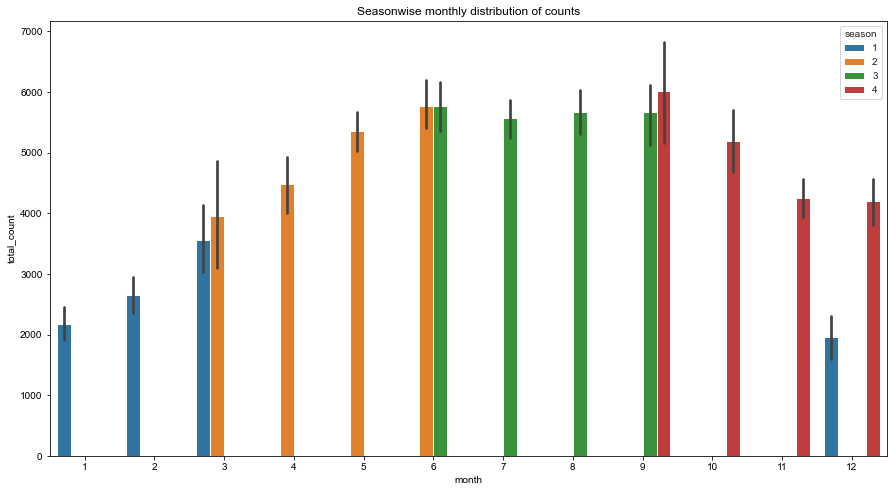

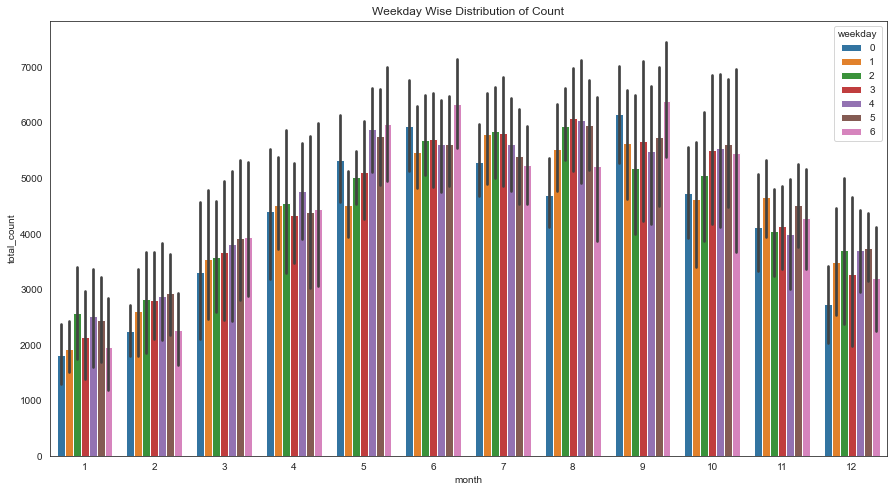

In [12]:
fig,ax = plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot seasonwise monthly distribution of counts
sns.barplot(x ='month',y ='total_count', data= bike_sharing[['month','total_count','season']],hue = 'season',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()
#Bar plot for weekday wise monthly distribution of counts
fig,ax1 = plt.subplots(figsize = (15,8))
sns.barplot(x='month',y='total_count',data = bike_sharing[['month','total_count','weekday']],hue='weekday',ax=ax1)
ax1.set_title('Weekday Wise Distribution of Count')
plt.show()


From the above plots, we can observed that increasing the bike rental count in springe and summer season and then decreasing the bike rental count in fall and winter season. Here,

season 1-> spring 
season 2 -> summer 
season 3 -> fall 
season 4 -> winter

**Yearly wise distribution of Counts**

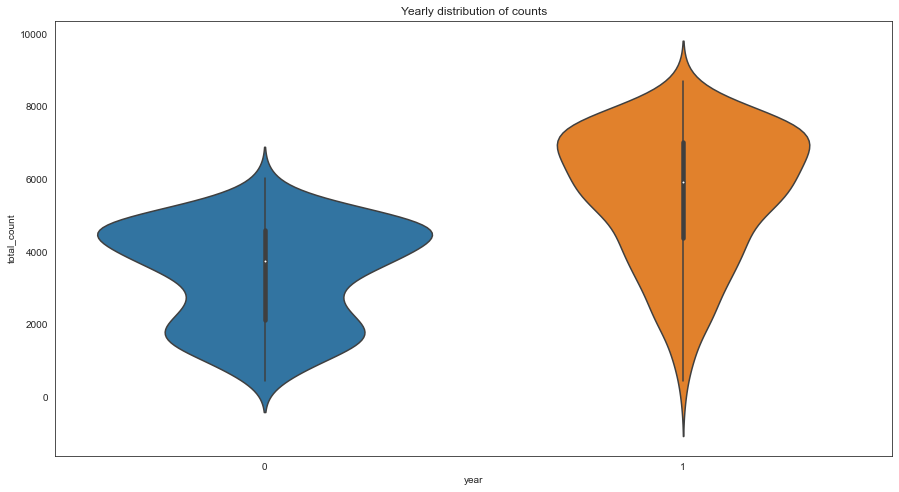

In [13]:
fig,ax = plt.subplots(figsize=(15,8))
#Violin plot for yealy distribution count
sns.violinplot(x='year',y='total_count',data = bike_sharing[['year','total_count']])
ax.set_title('Yearly distribution of counts')
plt.show()

From the violin plot, we can observed that the bike rental count distribution is highest in year 2012 then in year 2011. 

Here,  
year 0-> 2011, year 1-> 2012

**Holiday wise Distribution of counts**

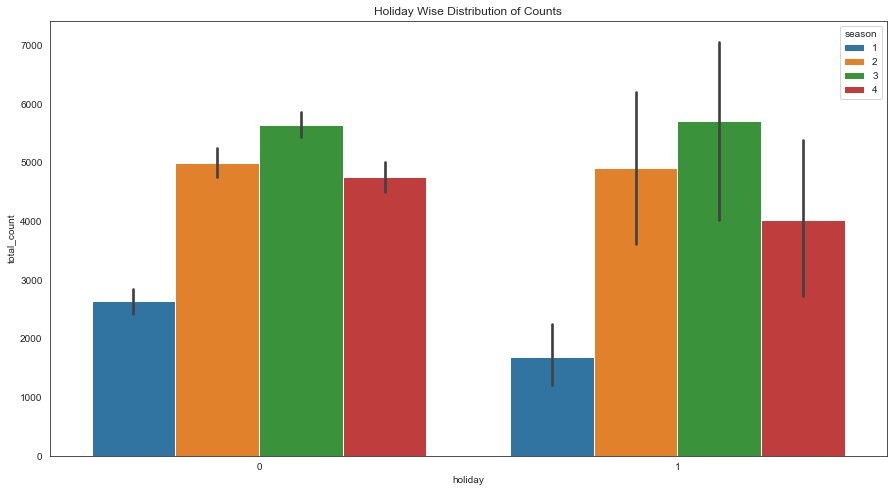

In [14]:
fig,ax = plt.subplots(figsize=(15,8))
#Barplot for Holiday Distribution of counts
sns.barplot(data=bike_sharing,x='holiday',y='total_count',hue = 'season')
ax.set_title('Holiday Wise Distribution of Counts')
plt.show()

From the above bar plot, we can observed that during no holiday the bike rental counts is highest compared to during holiday for different seasons.

Here, 0->No holiday, 1-> holiday

**Weather_Condition Wise Distribution of Counts**

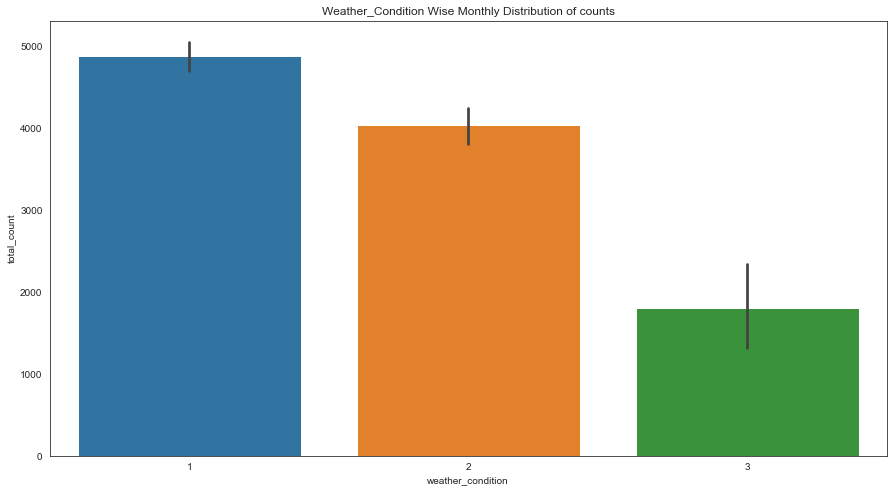

In [15]:
fig,ax1 = plt.subplots(figsize=(15,8))
#Bar plot for Weather_condition distribution of counts
sns.barplot(x='weather_condition',y='total_count',data=bike_sharing[['month','total_count','weather_condition']],ax=ax1)
ax1.set_title('Weather_Condition Wise Monthly Distribution of counts')
plt.show()

From the above bar plot, we can observed that during clear,partly cloudy weather the bike rental count is highest and the second highest is during mist cloudy weather and followed by third highest during light snow and light rain weather.

**Outlier Analysis**

**Total_Count_Outlier**

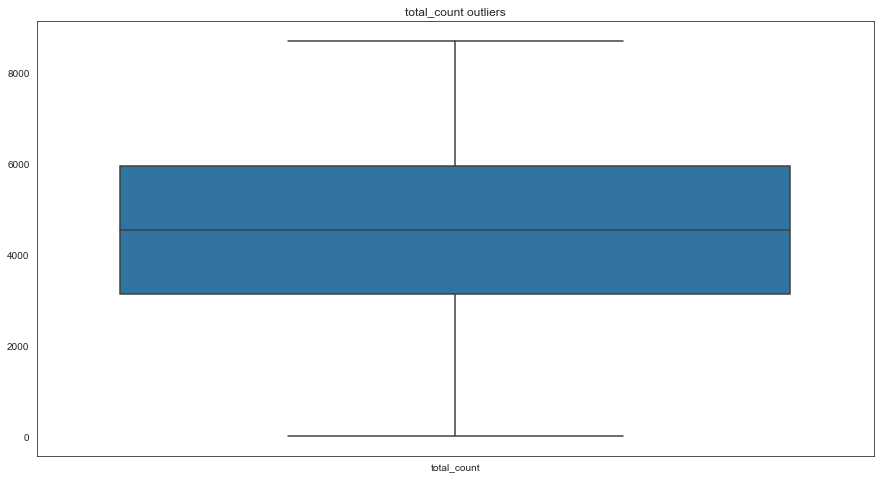

In [16]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for total_count outliers
sns.boxplot(data=bike_sharing[['total_count']])
ax.set_title('total_count outliers')
plt.show()

From the box plot, we can observed that no outliers are present in total_count variable.

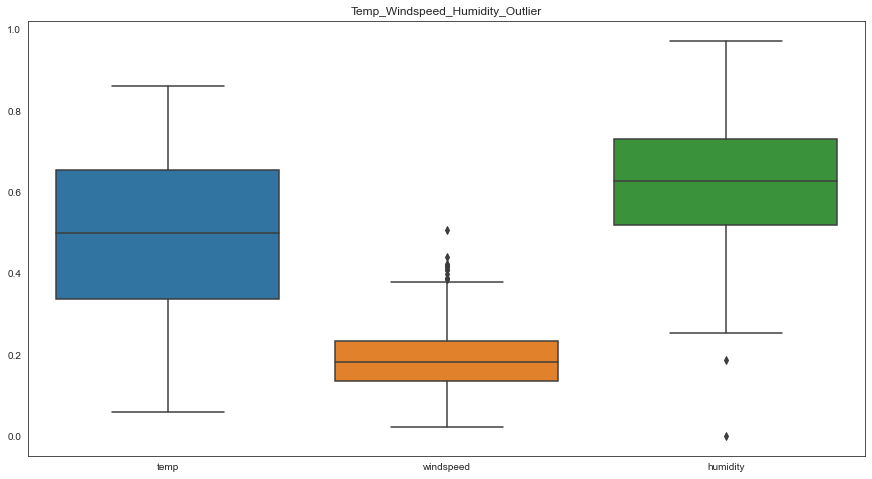

In [17]:
fig,ax = plt.subplots(figsize=(15,8))
#box plot for Temp_Windspeed_humidity_outlier
sns.boxplot(data=bike_sharing[['temp','windspeed','humidity']])
ax.set_title('Temp_Windspeed_Humidity_Outlier')
plt.show()

From the box plot, we can observed that no outliers are present in normalized temp but few outliers are present in normalized windspeed and humidity variable.

In [18]:
bike_sharing.isnull().sum()

rec_id               0
date                 0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

**Normal Probability Plot**

Normal Probability plot is a graphical technique to identify substantive departures from normality and also it tells about goodness of fit

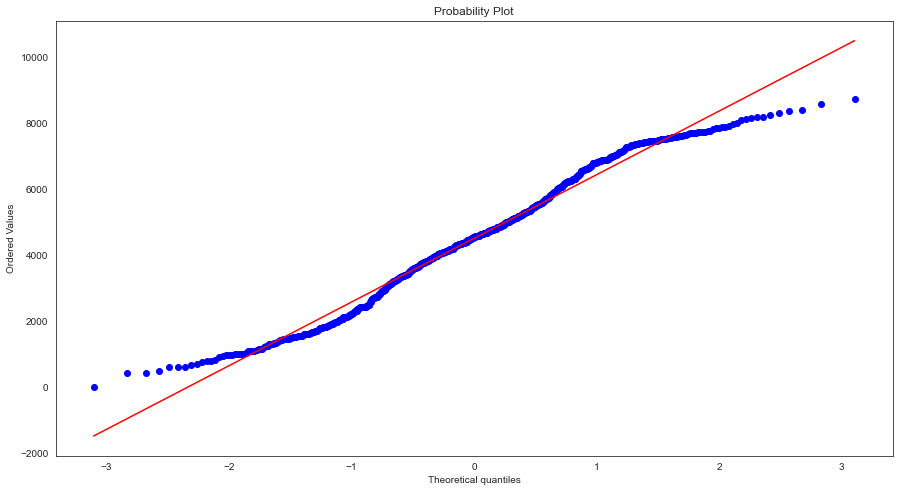

In [19]:
import scipy
from scipy import stats
#Normal plot
fig=plt.figure(figsize=(15,8))
stats.probplot(bike_sharing.total_count.tolist(),dist='norm',plot=plt)
plt.show()

**Correlation Matrix**

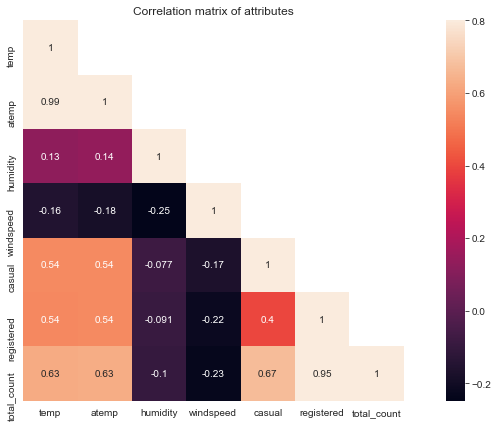

In [20]:
#create the correlation matrix
corrMt=bike_sharing[['temp','atemp','humidity','windspeed','casual','registered','total_count']].corr()
mask=np.array(corrMt)
mask[np.tril_indices_from(mask)]=False
#heat map for correaltion matrix for attributes

fig,ax = plt.subplots(figsize=(15,7))
sns.heatmap(corrMt,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

From correlation plot, we can observed that some features are positively correlated or some are negatively correlated to each other. The temp and atemp are highly positively correlated to each other, it means that both are carrying same information.The total_count,casual and registered are highly positively correlated to each other. So, we are going to ignore atemp,casual and registered variable for further analysis.

**Modeling the DataSet**

In [21]:
cat = ['season','workingday','weather_condition','year','holiday']
bike_sharing_conv = pd.get_dummies(bike_sharing,columns=cat)

bike_sharing_conv.drop('date',axis=1,inplace=True)
bike_sharing_conv.head()

,rec_id,month,weekday,temp,atemp,humidity,windspeed,casual,registered,total_count,...,season_4,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,year_0,year_1,holiday_0,holiday_1
0,1,1,6,0.344167,0.363625,0.805833,0.160446,331,654,985,...,0,1,0,0,1,0,1,0,1,0
1,2,1,0,0.363478,0.353739,0.696087,0.248539,131,670,801,...,0,1,0,0,1,0,1,0,1,0
2,3,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,...,0,0,1,1,0,0,1,0,1,0
3,4,1,2,0.200000,0.212122,0.590435,0.160296,108,1454,1562,...,0,0,1,1,0,0,1,0,1,0
4,5,1,3,0.226957,0.229270,0.436957,0.186900,82,1518,1600,...,0,0,1,1,0,0,1,0,1,0


In [22]:
bike_sharing_conv.head()

,rec_id,month,weekday,temp,atemp,humidity,windspeed,casual,registered,total_count,...,season_4,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,year_0,year_1,holiday_0,holiday_1
0,1,1,6,0.344167,0.363625,0.805833,0.160446,331,654,985,...,0,1,0,0,1,0,1,0,1,0
1,2,1,0,0.363478,0.353739,0.696087,0.248539,131,670,801,...,0,1,0,0,1,0,1,0,1,0
2,3,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,...,0,0,1,1,0,0,1,0,1,0
3,4,1,2,0.200000,0.212122,0.590435,0.160296,108,1454,1562,...,0,0,1,1,0,0,1,0,1,0
4,5,1,3,0.226957,0.229270,0.436957,0.186900,82,1518,1600,...,0,0,1,1,0,0,1,0,1,0


In [23]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
np.random.seed(88)

In [24]:
x = bike_sharing_conv.drop("total_count",axis=1)
y = bike_sharing_conv["total_count"]

In [25]:
bike_sharing_conv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   rec_id               731 non-null    int64   
 1   month                731 non-null    category
 2   weekday              731 non-null    category
 3   temp                 731 non-null    float64 
 4   atemp                731 non-null    float64 
 5   humidity             731 non-null    float64 
 6   windspeed            731 non-null    float64 
 7   casual               731 non-null    int64   
 8   registered           731 non-null    int64   
 9   total_count          731 non-null    int64   
 10  season_1             731 non-null    uint8   
 11  season_2             731 non-null    uint8   
 12  season_3             731 non-null    uint8   
 13  season_4             731 non-null    uint8   
 14  workingday_0         731 non-null    uint8   
 15  workingday_1         73

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
model = RandomForestRegressor()

model.fit(x_train,y_train)

model_score = model.score(x_test,y_test)
print('Accuracy of the model : ',model_score)

Accuracy of the model :  0.9946538143322402


In [27]:
r2_scores = cross_val_score(model, x_train, y_train, cv=5)
print(r2_scores)
print('R-Squared Scores : ',np.average(r2_scores))

[0.9959103  0.99465898 0.99582609 0.99428839 0.98988735]
R-Squared Scores :  0.9941142215541616


In [28]:
print(f"Accuracy : {np.mean(r2_scores)*100:.2f}%")

Accuracy : 99.41%


In [29]:
model.predict(x_test)

array([7063.81, 2370.9 , 6884.43, 5438.08, 7490.46, 6357.08, 2347.43,
       4102.15, 7484.14, 5084.47, 3448.65, 7302.07, 4587.33, 4716.64,
       5227.17, 7095.22, 5125.99, 6735.76, 2197.81, 2707.78, 3267.57,
       4684.36, 6751.46, 2184.43, 7699.19, 6897.86, 5644.44, 6859.12,
       4173.22, 6847.42, 6211.46, 2422.95, 2106.49, 4668.7 , 3788.59,
       1724.11, 5622.34, 4093.8 , 1539.59, 7605.2 , 6427.21, 7398.29,
       2649.07, 7832.26, 2690.54, 2322.15, 1691.56, 3723.38, 5050.85,
       3526.84, 1198.49, 4716.33, 4469.75, 6857.55, 7648.19, 2184.25,
       4593.33, 3608.71, 7691.68, 3280.66, 4600.54, 6347.96, 3847.02,
       1968.71, 7440.95, 5279.95, 7311.21, 2096.34, 6176.  , 1638.16,
       3393.46, 4468.28, 4255.88, 6575.73, 2385.66, 2827.61, 3213.08,
       1411.66, 2031.76, 7455.05, 3633.85, 7729.4 , 3335.27, 4797.63,
       2682.96, 6678.57, 6596.34, 5617.24, 7360.35, 7150.09, 4068.92,
       4884.14, 4851.96, 7549.16, 1391.53,  762.91, 5191.71, 4526.21,
       5979.67, 3568

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test,y_preds)
print(mae)

mse = mean_squared_error(y_test,y_preds)
print(mse)

88.73409090909091
20551.886456363638


In [31]:
y_test

520    6998
364    2485
569    6966
436    5298
656    7509
       ... 
544    6879
366    1951
712    5532
192    4258
667      22
Name: total_count, Length: 220, dtype: int64

In [32]:
y_preds = model.predict(x_test)
y_preds

array([7063.81, 2370.9 , 6884.43, 5438.08, 7490.46, 6357.08, 2347.43,
       4102.15, 7484.14, 5084.47, 3448.65, 7302.07, 4587.33, 4716.64,
       5227.17, 7095.22, 5125.99, 6735.76, 2197.81, 2707.78, 3267.57,
       4684.36, 6751.46, 2184.43, 7699.19, 6897.86, 5644.44, 6859.12,
       4173.22, 6847.42, 6211.46, 2422.95, 2106.49, 4668.7 , 3788.59,
       1724.11, 5622.34, 4093.8 , 1539.59, 7605.2 , 6427.21, 7398.29,
       2649.07, 7832.26, 2690.54, 2322.15, 1691.56, 3723.38, 5050.85,
       3526.84, 1198.49, 4716.33, 4469.75, 6857.55, 7648.19, 2184.25,
       4593.33, 3608.71, 7691.68, 3280.66, 4600.54, 6347.96, 3847.02,
       1968.71, 7440.95, 5279.95, 7311.21, 2096.34, 6176.  , 1638.16,
       3393.46, 4468.28, 4255.88, 6575.73, 2385.66, 2827.61, 3213.08,
       1411.66, 2031.76, 7455.05, 3633.85, 7729.4 , 3335.27, 4797.63,
       2682.96, 6678.57, 6596.34, 5617.24, 7360.35, 7150.09, 4068.92,
       4884.14, 4851.96, 7549.16, 1391.53,  762.91, 5191.71, 4526.21,
       5979.67, 3568

In [33]:
predict = cross_val_predict(model, x_train, y_train,cv=5)
model_preds = model.predict(x_test)
model_preds

array([7063.81, 2370.9 , 6884.43, 5438.08, 7490.46, 6357.08, 2347.43,
       4102.15, 7484.14, 5084.47, 3448.65, 7302.07, 4587.33, 4716.64,
       5227.17, 7095.22, 5125.99, 6735.76, 2197.81, 2707.78, 3267.57,
       4684.36, 6751.46, 2184.43, 7699.19, 6897.86, 5644.44, 6859.12,
       4173.22, 6847.42, 6211.46, 2422.95, 2106.49, 4668.7 , 3788.59,
       1724.11, 5622.34, 4093.8 , 1539.59, 7605.2 , 6427.21, 7398.29,
       2649.07, 7832.26, 2690.54, 2322.15, 1691.56, 3723.38, 5050.85,
       3526.84, 1198.49, 4716.33, 4469.75, 6857.55, 7648.19, 2184.25,
       4593.33, 3608.71, 7691.68, 3280.66, 4600.54, 6347.96, 3847.02,
       1968.71, 7440.95, 5279.95, 7311.21, 2096.34, 6176.  , 1638.16,
       3393.46, 4468.28, 4255.88, 6575.73, 2385.66, 2827.61, 3213.08,
       1411.66, 2031.76, 7455.05, 3633.85, 7729.4 , 3335.27, 4797.63,
       2682.96, 6678.57, 6596.34, 5617.24, 7360.35, 7150.09, 4068.92,
       4884.14, 4851.96, 7549.16, 1391.53,  762.91, 5191.71, 4526.21,
       5979.67, 3568

In [34]:
result = pd.DataFrame(data={"Actual Values" : y_test,
                           "predictions": y_preds})
result

,Actual Values,predictions
520,6998,7063.81
364,2485,2370.90
569,6966,6884.43
436,5298,5438.08
656,7509,7490.46
...,...,...
544,6879,7071.64
366,1951,2167.56
712,5532,5603.50
192,4258,4270.81


In [35]:
print(f"Accuracy : {np.mean(r2_scores)*100:.2f}%")

Accuracy : 99.41%


In [36]:
print("Regression model metrics on the test set:")

print(f"MAE: {mean_absolute_error(y_test, y_preds):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_preds):.4f}")

Regression model metrics on the test set:
MAE: 88.7341
MSE: 20551.8865


In [37]:

print(f"R^2: {r2_score(y_test, y_preds):.4f}")


R^2: 0.9947


In [38]:
def result():
    
    print("Regression model metrics on the test set:")
    print(f"R^2: {r2_score(y_test, y_preds):.4f}")
    print(f"MAE: {mean_absolute_error(y_test, y_preds):.4f}")
    print(f"MSE: {mean_squared_error(y_test, y_preds):.4f}")

In [39]:
result()

Regression model metrics on the test set:
R^2: 0.9947
MAE: 88.7341
MSE: 20551.8865


In [40]:
import numpy as np
np.random.seed(88)
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8]}


In [41]:
rf = RandomForestRegressor()
rf_randomcv = RandomizedSearchCV(estimator=rf, param_distributions= random_grid,n_iter = 100,cv=4,verbose=2,n_jobs=-1)
rf_randomcv.fit(x_train,y_train)


Fitting 4 folds for each of 100 candidates, totalling 400 fits


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=2)

In [42]:
rf_randomcv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 120}

In [43]:

rf_randomcv

RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=2)

In [44]:
result()

Regression model metrics on the test set:
R^2: 0.9947
MAE: 88.7341
MSE: 20551.8865


In [45]:
best_random_grid=rf_randomcv.best_estimator_
y_preds = best_random_grid.predict(x_test)


In [46]:
result()

Regression model metrics on the test set:
R^2: 0.9947
MAE: 88.2172
MSE: 20384.1861


**GridSearchCV**

In [47]:
rf_randomcv.best_params_


{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 120}

In [48]:
np.random.seed(88)
from sklearn.model_selection import GridSearchCV


param_grid ={
    'max_depth' : [rf_randomcv.best_params_['max_depth']],
    'max_features' : [
        rf_randomcv.best_params_['max_features']
                    ],
    'min_samples_leaf' : [
        rf_randomcv.best_params_['min_samples_leaf'],
        rf_randomcv.best_params_['min_samples_leaf']+2,
        rf_randomcv.best_params_['min_samples_leaf']+ 4
                            ],
    'min_samples_split' : [
        rf_randomcv.best_params_['min_samples_split'],
        rf_randomcv.best_params_['min_samples_split']- 2,
        rf_randomcv.best_params_['min_samples_split']- 1,
        rf_randomcv.best_params_['min_samples_split'],
        rf_randomcv.best_params_['min_samples_split']+1,
        rf_randomcv.best_params_['min_samples_split']+2
                         ],
    'n_estimators' : [
        rf_randomcv.best_params_['n_estimators']-200,
        rf_randomcv.best_params_['n_estimators']-100,
        rf_randomcv.best_params_['n_estimators'],
        rf_randomcv.best_params_['n_estimators']+100,
        rf_randomcv.best_params_['n_estimators']+200
                    ]
}

print(param_grid)

{'max_depth': [120], 'max_features': ['auto'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [2, 0, 1, 2, 3, 4], 'n_estimators': [800, 900, 1000, 1100, 1200]}


In [49]:
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)

grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 90 candidates, totalling 900 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [120], 'max_features': ['auto'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 0, 1, 2, 3, 4],
                         'n_estimators': [800, 900, 1000, 1100, 1200]},
             verbose=2)

In [50]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=120, min_samples_split=3, n_estimators=800)

In [51]:
best_grid = grid_search.best_estimator_

In [52]:
best_grid

RandomForestRegressor(max_depth=120, min_samples_split=3, n_estimators=800)

In [53]:
y_preds = best_grid.predict(x_test)

result()

Regression model metrics on the test set:
R^2: 0.9947
MAE: 86.9223
MSE: 20295.7495


In [54]:
np.random.seed(88)
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials


space = {'criterion': hp.choice('criterion', ['mae', 'mse']),
        'max_depth': hp.quniform('max_depth', 10, 1000, 10),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 1),
        'min_samples_split' : hp.uniform ('min_samples_split', 0,1),
        'n_estimators' : hp.choice('n_estimators', [10, 50,100, 300,800,1200,1300,1400,1500])
    }

In [55]:
space

{'criterion': <hyperopt.pyll.base.Apply at 0x20d6ac591f0>,
 'max_depth': <hyperopt.pyll.base.Apply at 0x20d6b70a6a0>,
 'max_features': <hyperopt.pyll.base.Apply at 0x20d6b70a730>,
 'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x20d6b70a910>,
 'min_samples_split': <hyperopt.pyll.base.Apply at 0x20d6b70aa30>,
 'n_estimators': <hyperopt.pyll.base.Apply at 0x20d6b70ab20>}

In [56]:
def objective(space):
    model = RandomForestRegressor(
        criterion = space['criterion'],
        max_depth = space['max_depth'],
        max_features = space['max_features'],
        min_samples_leaf = space['min_samples_leaf'],
        min_samples_split = space['min_samples_split'],
        n_estimators = space['n_estimators']
    )
    
    accuracy = cross_val_score(model,x_train,y_train,cv=5).mean()
    
    return{'loss': -accuracy,'status': STATUS_OK}


In [57]:
from sklearn.model_selection import cross_val_score
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 80,
            trials= trials)
best

100%|█████████████████████████████████████████████| 80/80 [1:11:57<00:00, 53.97s/trial, best loss: -0.9106408094084874]


{'criterion': 1,
 'max_depth': 850.0,
 'max_features': 0,
 'min_samples_leaf': 0.08662835139023939,
 'min_samples_split': 0.15384948047618552,
 'n_estimators': 7}

In [58]:
crit = {0: 'mse', 1: 'mae'}
feat = {0: 'auto', 1: 'sqrt', 2: 'log2', 3: None}
est = {0:10, 1:50,2:100,3:300,4:800,5:1200,6:1300,7:1400,8:1500}


print(crit[best['criterion']])
print(feat[best['max_features']])
print(est[best['n_estimators']])

mae
auto
1400


In [59]:
best['min_samples_leaf']


0.08662835139023939

In [60]:
trainedforest = RandomForestRegressor(criterion = crit[best['criterion']], max_depth = best['max_depth'], 
                                       max_features = feat[best['max_features']], 
                                       min_samples_leaf = best['min_samples_leaf'], 
                                       min_samples_split = best['min_samples_split'], 
                                       n_estimators = est[best['n_estimators']]).fit(x_train,y_train)
y_preds = trainedforest.predict(x_test)

result()

Regression model metrics on the test set:
R^2: 0.9364
MAE: 350.2624
MSE: 244361.5226


**Genetic Algorithms**

In [61]:
import numpy as np
np.random.seed(88)
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10,500,10)]
# Minimum number of samples required to split a node
min_samples_split = [2,5,7,9,10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4,6,8,10]
# Create the random grid
param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['mse','mae']}
print(param)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 64, 118, 173, 227, 282, 336, 391, 445, 500], 'min_samples_split': [2, 5, 7, 9, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8, 10], 'criterion': ['mse', 'mae']}


In [ ]:
from tpot import TPOTRegressor


tpot_regressor = TPOTRegressor(generations= 5, population_size= 100,
                                 verbosity= 4, n_jobs = -1,
                                 config_dict={'sklearn.ensemble.RandomForestRegressor': param}, 
                                 cv = 5)
tpot_regressor.fit(x_train,y_train)

1 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/600 [00:00<?, ?pipeline/s]

In [ ]:
accuracy = tpot_regressor.score(x_test, y_test)
print(accuracy)

In [ ]:
y_preds = tpot_regressor.predict(x_test)

result()